In [161]:
import pandas as pd
import requests
import numpy as np
import json
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [51]:
def run_query(query):  # A simple function to use requests.post to make the API call.
    headers = {'X-API-KEY': 'BQYCaXaMZlqZrPCSQVsiJrKtxKRVcSe4'}
    request = requests.post('https://graphql.bitquery.io/', json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        print(request.reason)
        raise Exception('Query failed and return code is {}.{}'.format(request.status_code, query))

In [54]:
registry = dict(json.loads(requests.get("https://friktion-labs.github.io/mainnet-tvl-snapshots/friktionSnapshot.json").content))


# Withdrawals CSP

https://solscan.io/tx/4ogUn5CVKibzz4RXNBM9fGMR3TVSMyGv3zeFy4WxFDZeYqugAbSV7LUJrz8GG1KtuHDa6PuLrZ7p7avENhHgBY6F

In [65]:
[x['globalId'] for x in registry['allMainnetVolts']]

['mainnet_income_call_btc',
 'mainnet_income_call_sol',
 'mainnet_income_call_sol_high',
 'mainnet_income_call_marinade',
 'mainnet_income_call_eth',
 'mainnet_income_call_ftt',
 'mainnet_income_call_srm',
 'mainnet_income_call_mngo',
 'mainnet_income_call_socean',
 'mainnet_income_call_sbr',
 'mainnet_income_call_luna',
 'mainnet_income_call_ray',
 'mainnet_income_call_step',
 'mainnet_income_call_stsol',
 'mainnet_income_put_luna',
 'mainnet_income_put_sol',
 'mainnet_income_put_sol_high',
 'mainnet_income_put_mngo',
 'mainnet_income_put_btc',
 'mainnet_income_put_tsUSDC',
 'mainnet_income_put_eth',
 'mainnet_income_put_sol_step_circuits',
 'mainnet_income_put_sol_parrot_circuits',
 'mainnet_income_put_sol_uxd_circuits']

In [71]:
volts02 = list(filter(lambda x: "put" in x["globalId"], registry['allMainnetVolts']))

In [ ]:
volts02_

In [70]:
volts02

[{'globalId': 'mainnet_income_put_luna',
  'voltVaultId': '3aL9h1PVt2rbUPo11QZpRbpLJhWHrHCpizsirWhMXiXB',
  'extraVaultDataId': '',
  'quoteMint': '9vMJfxuKxXBoEa7rM12mYLMwTacLMLDJqHozw96WQL8i',
  'underlyingMint': 'F6v4wfAdJB8D8p77bMXZgYt8TDKsYxLYxH5AFhUkYx9W',
  'depositTokenMint': '9vMJfxuKxXBoEa7rM12mYLMwTacLMLDJqHozw96WQL8i',
  'shareTokenMint': '74ozhToAS71nDVBtFZMMucdkNB95tV2o5fhtFGQeixwS',
  'shareTokenSymbol': 'fpLUNA',
  'shareTokenDecimals': 6,
  'depositPool': '6FVEVQ1FoJD3HbG5s1sHUxNjLD2L53thmrZKvuLmCeVR',
  'premiumPool': '4WhTWA9wkL7DBJbPLFsrRv1n5pR1sgYCQaCpdqs3VLsE',
  'depositTokenSymbol': 'UST',
  'depositTokenCoingeckoId': 'terrausd',
  'underlyingTokenSymbol': 'LUNA',
  'underlyingTokenCoingeckoId': 'terra-luna',
  'voltType': 2,
  'apy': 41.92},
 {'globalId': 'mainnet_income_put_sol',
  'voltVaultId': '2evPXRLaTZj92DM93sdryeszwqoC9C6DoWa1TKHn1AzU',
  'extraVaultDataId': '',
  'quoteMint': 'EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v',
  'underlyingMint': 'So111111

In [35]:
query_date = '"2021-12-16", "2022-03-22"'

In [129]:
volt_ids = """"6Nkc8MEiz3WLz1xthYitmSuy3NGwn7782upRHo2iFmXK","GrB6vbG2WP7eEnbwgxUbBGRMeXYq139jo2o9oW8cNK8f","AQRGh6PU7LzDHvvoPNS7wVVQaCBeftw9kVDAnvuEjbs8","EA29Xf3HGMtYziw7UKZDUKby7gkoCbXwmiNKwc7z54Ax",
        "5kA7FPiB3t2X5s65dK1AoEu5asDjC5d7f5vaB4iY2yrj",
        "CVrRw6VtxSjokm2tKmaS5RCuoc9EFjN4wEoov6f2PST6"
"""

In [130]:
volt_ids

'"6Nkc8MEiz3WLz1xthYitmSuy3NGwn7782upRHo2iFmXK","GrB6vbG2WP7eEnbwgxUbBGRMeXYq139jo2o9oW8cNK8f","AQRGh6PU7LzDHvvoPNS7wVVQaCBeftw9kVDAnvuEjbs8","EA29Xf3HGMtYziw7UKZDUKby7gkoCbXwmiNKwc7z54Ax",\n        "5kA7FPiB3t2X5s65dK1AoEu5asDjC5d7f5vaB4iY2yrj",\n        "CVrRw6VtxSjokm2tKmaS5RCuoc9EFjN4wEoov6f2PST6"\n'

In [187]:
query = """
    query{
    solana(network: solana) {
    transfers(
      date: {between: ["""+ query_date +"""]}
      transferType: {is: transfer}
      any: [{senderAddress: {in: ["""+ volt_ids +"""]}}]
    ) {
      amount
      currency {
        symbol
        address
      }
      block {
        timestamp {
          iso8601
        }
      }
      transaction {
        signer
        signature
        innerInstructionsCount
      }
      receiver {
        address
      }
      sender {
        address
      }
    }
  }
}
"""

result = run_query(query)

In [188]:
FEES_ADDRESS = '3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ'

MASTER_ADDRESS = 'DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE'

In [190]:
# convert GraphQL json to pandas dataframe
df = pd.json_normalize(result['data']['solana']['transfers'])
df = df.rename(columns={"block.timestamp.iso8601": "date", "currency.symbol": "symbol", 
                        "transaction.signer":"signer", "currency.address":"cash",
                        "receiver.address":"receiver", "sender.address":"asset", "transaction.signature": "tx_id"})
# if transaction signer & receiver is diff, drop row

# only valid withdrawal if they pay fees to the volt...

df = df.query("receiver == '{}'".format(FEES_ADDRESS)).reset_index(drop=True)
# assign asset label over address
# UST: 9vMJfxuKxXBoEa7rM12mYLMwTacLMLDJqHozw96WQL8i
# tsUSDC: Cvvh8nsKZet59nsDDo3orMa3rZnPWQhpgrMCVcRDRgip
# USDC: EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v
# cash_conditions = [
#         (df['cash'] == "9vMJfxuKxXBoEa7rM12mYLMwTacLMLDJqHozw96WQL8i"),
#         (df['cash'] == "Cvvh8nsKZet59nsDDo3orMa3rZnPWQhpgrMCVcRDRgip"),
#         (df['cash'] == "EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v"),
#     ]

# # relabeling addresses as asset labels
# cash_Categories = ["UST", "tsUSDC", "USDC"]
# df['cash'] = np.select(cash_conditions, cash_Categories)
# # remove non-stablecoin assets
# df = df[df["cash"] != "0"]

# Volt 02 SOL Put: 6Nkc8MEiz3WLz1xthYitmSuy3NGwn7782upRHo2iFmXK
# Volt 02 SOL Put (tsUSDC): AQRGh6PU7LzDHvvoPNS7wVVQaCBeftw9kVDAnvuEjbs8
# Volt 02 SOL Put (High): AQRGh6PU7LzDHvvoPNS7wVVQaCBeftw9kVDAnvuEjbs8
# Volt 02 BTC Put: GrB6vbG2WP7eEnbwgxUbBGRMeXYq139jo2o9oW8cNK8f
# Volt 02 ETH Put: EA29Xf3HGMtYziw7UKZDUKby7gkoCbXwmiNKwc7z54Ax
# Volt 02 LUNA Put: 5kA7FPiB3t2X5s65dK1AoEu5asDjC5d7f5vaB4iY2yrj
# Volt 02 MNGO Put: CVrRw6VtxSjokm2tKmaS5RCuoc9EFjN4wEoov6f2PST6

asset_conditions = [
        (df['asset'] == "6Nkc8MEiz3WLz1xthYitmSuy3NGwn7782upRHo2iFmXK"),
        (df['asset'] == "GrB6vbG2WP7eEnbwgxUbBGRMeXYq139jo2o9oW8cNK8f"),
        (df['asset'] == "AQRGh6PU7LzDHvvoPNS7wVVQaCBeftw9kVDAnvuEjbs8"),
        (df['asset'] == "EA29Xf3HGMtYziw7UKZDUKby7gkoCbXwmiNKwc7z54Ax"),
        (df['asset'] == "5kA7FPiB3t2X5s65dK1AoEu5asDjC5d7f5vaB4iY2yrj"),
        (df['asset'] == "CVrRw6VtxSjokm2tKmaS5RCuoc9EFjN4wEoov6f2PST6"),
    ]

# relabeling addresses as asset labels
asset_Categories = ["SOL", "BTC", "SOL (tsUSDC)", "ETH", "LUNA", "MNGO"]
df['asset'] = np.select(asset_conditions, asset_Categories)

In [184]:
withdrawals = df.loc[(df.signer==MASTER_ADDRESS) & (df["transaction.innerInstructionsCount"]==1)]

In [185]:
withdrawals.amount.sum()

14576.557185000001

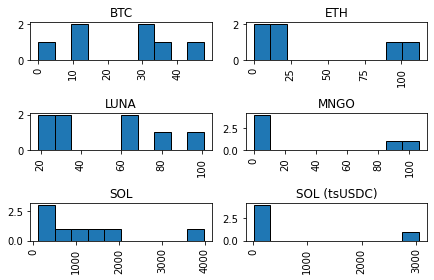

In [186]:
withdrawals["amount"].hist(by=withdrawals.asset, edgecolor='black')
plt.tight_layout()

In [194]:
# Label tsUSDC as its own symbol

In [195]:
df.symbol.unique()

array(['', 'USDC', 'UST'], dtype=object)

# WITHDRAWALS CALLS

In [169]:
query = """
    query{
    solana(network: solana) {
    transfers(
      date: {between: ["""+ query_date +"""]}
      transferType: {is: transfer}
      any: [{senderAddress: {in: [
        "Hxtb6APfNtf9m8jJjh7uYp8fCTGr9aeHxBSfiPqCrV6G",
        "DA1M8mw7GnPNKU9ReANtHPQyuVzKZtsuuSbCyc2uX2du",
        "6asST5hurmxJ8uFvh7ZRWkrMfSEzjEAJ4DNR1is3G6eH",
        "FThcy5XXvab5u3jbA6NjWKdMNiCSV3oY5AAkvEvpa8wp",
        "7KqHFuUksvNhrWgoacKkqyp2RwfBNdypCYgK9nxD1d6K",
        "2P427N5sYcEXvZAZwqNzjXEHsBMESQoLyjNquTSmGPMb",
        "B3yakZxwomkmnCxRr8ZmQtiWgtxtVBuCREDFDdAvcCVQ",
        "A5MpyajTy6hdsg3S2em5ukcgY1ZBhxTxEKv8BgHajv1A",
        "BH7Jg3f97FyeGxsPR7FFskvfqGiaLeUnJ9Ksda53Jj8h",
        "5oV1Yf8q1oQgPYuHjepjmKFuaG2Wng9dzTqbSWhU5W2X",
        "A6XsYxGj9wpqUZG81XwgQJ2zJ3efCbuWSQfnkHqUSmdM"]}}]
    ) {
      amount
      currency {
        symbol
      }
      block {
        timestamp {
          iso8601
        }
      }
      transaction {
        signer
        signature
        innerInstructionsCount
      }
      receiver {
        address
      }
      sender {
        address
      }
    }
  }
}
"""

result = run_query(query)
# convert GraphQL json to pandas dataframe
df = pd.json_normalize(result['data']['solana']['transfers'])
df = df.rename(columns={"block.timestamp.iso8601": "date", "currency.symbol": "symbol", 
                        "transaction.signer":"signer", "currency.address":"cash",
                        "receiver.address":"receiver", "sender.address":"asset", "transaction.signature": "tx_id"})
# Does json_normalize flatten a json file for you??
df["tx_id"] = df["tx_id"].apply(lambda x: "https://solscan.io/tx/{}".format(FEES_ADDRESS))
# if transaction signer & receiver is diff, drop row
df = df.query("receiver == '{}'".format(FEES_ADDRESS)).reset_index(drop=True)

# assign asset label over sender address
asset_conditions = [
        (df['asset'] == "Hxtb6APfNtf9m8jJjh7uYp8fCTGr9aeHxBSfiPqCrV6G"),
        (df['asset'] == "DA1M8mw7GnPNKU9ReANtHPQyuVzKZtsuuSbCyc2uX2du"),
        (df['asset'] == "6asST5hurmxJ8uFvh7ZRWkrMfSEzjEAJ4DNR1is3G6eH"),
        (df['asset'] == "FThcy5XXvab5u3jbA6NjWKdMNiCSV3oY5AAkvEvpa8wp"),
        (df['asset'] == "7KqHFuUksvNhrWgoacKkqyp2RwfBNdypCYgK9nxD1d6K"),
        (df['asset'] == "2P427N5sYcEXvZAZwqNzjXEHsBMESQoLyjNquTSmGPMb"),
        (df['asset'] == "B3yakZxwomkmnCxRr8ZmQtiWgtxtVBuCREDFDdAvcCVQ"),
        (df['asset'] == "A5MpyajTy6hdsg3S2em5ukcgY1ZBhxTxEKv8BgHajv1A"),
        (df['asset'] == "BH7Jg3f97FyeGxsPR7FFskvfqGiaLeUnJ9Ksda53Jj8h"),
        (df['asset'] == "5oV1Yf8q1oQgPYuHjepjmKFuaG2Wng9dzTqbSWhU5W2X"),
        (df['asset'] == "A6XsYxGj9wpqUZG81XwgQJ2zJ3efCbuWSQfnkHqUSmdM")
    ]

# relabeling addresses as asset labels
asset_Categories = ["SOL", "BTC", "mSOL", "ETH", "FTT", "SRM", "MNGO", "scnSOL", "SBR", "LUNA", "RAY"]
df['asset'] = np.select(asset_conditions, asset_Categories)

In [170]:
df.columns

Index(['amount', 'symbol', 'date', 'signer', 'tx_id', 'transaction.innerInstructionsCount', 'receiver', 'asset'], dtype='object')

In [171]:
df

,amount,symbol,date,signer,tx_id,transaction.innerInstructionsCount,receiver,asset
0,0.000249,BTC,2021-12-31T08:17:54Z,DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,4,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,BTC
1,0.170870,BTC,2022-01-07T08:42:14Z,DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,4,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,BTC
2,0.112000,BTC,2022-01-14T08:34:26Z,DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,4,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,BTC
3,0.060020,BTC,2022-01-21T08:24:52Z,DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,4,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,BTC
4,0.000203,BTC,2022-01-21T08:26:18Z,9FDHtzdTbBKxyncpb8bCzzNgpJBCFLVG9B4anEYPQq95,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,5,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,BTC
...,...,...,...,...,...,...,...,...
235,0.155903,scnSOL,2022-03-04T02:35:04Z,DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,1,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,scnSOL
236,9.483000,scnSOL,2022-03-11T02:38:09Z,DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,4,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,scnSOL
237,0.059191,scnSOL,2022-03-11T02:38:27Z,DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,1,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,scnSOL
238,7.244000,scnSOL,2022-03-18T02:27:34Z,DxMJgeSVoe1cWo1NPExiAsmn83N3bADvkT86dSP1k7WE,https://solscan.io/tx/3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,4,3KjJiWBfaw96qGhysq6Fc9FTxdPgPTNY6shM7Bwfp8EJ,scnSOL


In [172]:
withdrawals01 = df.loc[(df.signer==MASTER_ADDRESS) & (df["transaction.innerInstructionsCount"]==1)]

In [175]:
withdrawals01.groupby("asset").amount.sum()

asset
BTC          0.256253
ETH          1.397977
FTT         28.859512
LUNA        92.565639
MNGO      3499.265779
RAY          4.801589
SBR       6783.790275
SOL        144.859883
SRM        202.189150
mSOL        99.804956
scnSOL       5.244235
Name: amount, dtype: float64

In [196]:
244*95+30*50+92*100+4000+0.24*44000

48440.0

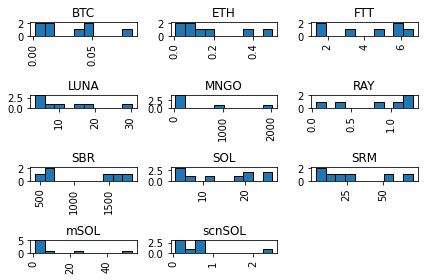

In [177]:
withdrawals01["amount"].hist(by=withdrawals01.asset, edgecolor='black')
plt.tight_layout()